# Problem Understanding & Dataset Analysis

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### To Load the Data in Kaggle Notebook

In [ ]:
import pandas as pd

# Load training data
train_df = pd.read_csv("/kaggle/input/data-crunch-round-1/train.csv")


# Load testing data
test_df = pd.read_csv("/kaggle/input/data-crunch-round-1/test.csv")


# Load sample submission file (optional - for futher works)
sample_submission = pd.read_csv("/kaggle/input/data-crunch-round-1/sample_submission.csv")



### Load data

In [ ]:
print(train_df.head())  # Display first few rows
print(test_df.head())  # Display first few rows
print(sample_submission.head())   #(optional - for test)

### Check the structure 

In [ ]:
test_df.info()

In [ ]:
train_df.info()

In [ ]:
print(test_df.describe())

In [ ]:
print(train_df.describe())

### Look for missing values 

In [ ]:
train_df.isnull().sum()

In [ ]:
test_df.isnull().sum()

## Check for duplicate 


In [ ]:
# Count duplicate rows - train_df
duplicate_count = train_df.duplicated().sum()

print(f"Number of duplicate rows (train): {duplicate_count}")


In [ ]:
# Count duplicate rows - test_df
duplicate_count = test_df.duplicated().sum()

print(f"Number of duplicate rows (test): {duplicate_count}")

In [ ]:
# Filter kingdom 'X' and convert temperature from Kelvin to Celsius
kingdom_x_df = train_df[train_df['kingdom'] == 'X'].copy()  # Filter rows where kingdom is 'X'

# Convert Avg_Temperature from Kelvin to Celsius
kingdom_x_df['Avg_Temperature_C'] = kingdom_x_df['Avg_Temperature'] - 273.15

# Display the first few rows
print(kingdom_x_df[['kingdom', 'Avg_Temperature', 'Avg_Temperature_C']].head())


In [ ]:
print(train_df['kingdom'].unique())  # Check available unique values


## Confirm Continuous Periods

In [ ]:
# Step 1: Check if there are any missing or invalid 'Month' values
print(train_df['Month'].unique())  # Check unique values in 'Month' to identify any problems




In [ ]:
# Step 2: Ensure 'Month' column has two digits (e.g., '01', '02', etc.)
train_df['Month'] = train_df['Month'].apply(lambda x: f"{int(x):02d}" if pd.notnull(x) else '01')



In [ ]:
# Step 3: Create the 'Date' column by combining 'Year' and 'Month', assuming the 1st day of each month
train_df['Date'] = pd.to_datetime(train_df['Year'].astype(str) + '-' + train_df['Month'] + '-01', format='%Y-%m-%d', errors='coerce')



In [ ]:
# Step 4: Check for any rows where the 'Date' couldn't be created (NaT values)
print(train_df[train_df['Date'].isna()])



In [ ]:
# Step 5: Sort the DataFrame by 'Date'
train_df = train_df.sort_values(by='Date')

# Step 6: Check the difference between consecutive dates
train_df['Date_Diff'] = train_df['Date'].diff()

# Step 7: Check for any gaps (where the difference is not one month)
gaps = train_df[train_df['Date_Diff'] != pd.Timedelta('30 days')]

# Display rows with gaps
print(gaps[['Year', 'Month', 'Date', 'Date_Diff']])

### Flag Invalid Date

In [ ]:
# Step 1: Ensure 'Month' column has two digits (e.g., '01', '02', etc.)
train_df['Month'] = train_df['Month'].apply(lambda x: f"{int(x):02d}" if pd.notnull(x) else '01')

# Step 2: Create the 'Date' column by combining 'Year' and 'Month', assuming the 1st day of each month
train_df['Date'] = pd.to_datetime(train_df['Year'].astype(str) + '-' + train_df['Month'] + '-01', format='%Y-%m-%d', errors='coerce')

# Step 3: Flag records with invalid dates (NaT values)
invalid_dates = train_df[train_df['Date'].isna()]

# Step 4: Display records with invalid dates
print("Records with invalid dates:")
print(invalid_dates[['Year', 'Month', 'Date']])


### plot histograms for numerical variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Select numerical columns
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate grid dimensions (rows and columns) based on the number of numerical columns
num_cols = len(numerical_cols)
num_rows = int(np.ceil(num_cols / 3))  # Create enough rows (3 columns per row)

# Step 3: Plot histograms for each numerical variable
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of rows and columns dynamically
    sns.histplot(train_df[col], kde=True, bins=20)  # KDE (Kernel Density Estimate) added for smoothness
    plt.title(f"Histogram of {col}")
    plt.tight_layout()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numerical columns
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Plot boxplots for each numerical variable
plt.figure(figsize=(15, len(numerical_cols) * 5))  # Dynamically adjust the height based on the number of columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 3, i)  # One boxplot per row
    sns.boxplot(data=train_df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()


# Correlation Analysis

### pairwise correlations to identify relationships 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix for numerical columns
correlation_matrix = train_df.select_dtypes(include=['float64', 'int64']).corr()

# Step 2: Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding title and showing the plot
plt.title('Pairwise Correlation Matrix')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix for numerical columns
correlation_matrix_test = test_df.select_dtypes(include=['float64', 'int64']).corr()

# Step 2: Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding title and showing the plot
plt.title('Pairwise Correlation Matrix')
plt.show()


In [ ]:
# Replace NaN values with 0 in the correlation matrix
correlation_matrix = correlation_matrix.fillna(0)

# Plot the heatmap again
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation Matrix')
plt.show()


In [ ]:
# Drop constant columns before computing the correlation matrix
test_df_clean = test_df.loc[:, test_df.nunique() > 1]  # Remove columns with only one unique value

# Compute the correlation matrix
correlation_matrix = test_df_clean.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap again
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation Matrix')
plt.show()


# Exploratory Data Analysis (EDA)

### Unit Standardization

In [ ]:
kelvin_kingdoms = train_df[train_df['Avg_Temperature'] > 100]['kingdom'].unique()
print("Kelvin Kingdoms:", kelvin_kingdoms)


### Convert to Celsius:


In [ ]:
# Convert temperatures from Kelvin to Celsius for those kingdoms
for kingdom in kelvin_kingdoms:
    mask = (train_df['kingdom'] == kingdom)
    train_df.loc[mask, 'Avg_Temperature'] -= 273.15
    train_df.loc[mask, 'Avg_Feels_Like_Temperature'] -= 273.15

print("Conversion to Celsius completed for:", kelvin_kingdoms)

### Verify

In [ ]:
# Check if any Avg_Temperature is still above 100°C
remaining_high_temps = train_df[train_df['Avg_Temperature'] > 100]

if not remaining_high_temps.empty:
    print("Warning: Some temperatures are still above 100°C")
    display(remaining_high_temps)  # Display the problematic records
else:
    print("Verification successful: No temperatures above 100°C remain.")


# Data Preprocessing

## Handle Missing Values

### Temperature

In [ ]:
train_df['Avg_Temperature'] = train_df.groupby('kingdom')['Avg_Temperature'].transform(lambda x: x.interpolate(method='linear').bfill().ffill())

# Check if any missing values remain
missing_temp = train_df['Avg_Temperature'].isna().sum()

# Display result
print(f"Remaining missing values in 'Avg_Temperature': {missing_temp}")


### Rainfall

In [ ]:
train_df['Rain_Amount'] = train_df.groupby('kingdom')['Rain_Amount'].ffill(limit=3).bfill(limit=3)

# Check remaining missing values
missing_rain = train_df['Rain_Amount'].isna().sum()
print(f"Remaining missing values in 'Rain_Amount': {missing_rain}")


In [ ]:
train_df = train_df.dropna(subset=['Radiation'], thresh=1)

# Check remaining missing values in Radiation
missing_radiation = train_df['Radiation'].isna().sum()
print(f"Remaining missing values in 'Radiation': {missing_radiation}")


# Feature Engineering

## Temporal Features

### Lag Features (e.g., 1-day, 7-day, 30-day lags)

In [ ]:
for lag in [1, 7, 30]:  
    train_df[f'temp_lag_{lag}'] = train_df.groupby('kingdom')['Avg_Temperature'].shift(lag)

train_df[['kingdom', 'Avg_Temperature', 'temp_lag_1', 'temp_lag_7', 'temp_lag_30']].head()


### Rolling Statistics (e.g., 7-day moving average)

In [ ]:
# Calculate the 7-day moving average of Avg_Temperature for each kingdom
train_df['temp_7d_ma'] = train_df.groupby('kingdom')['Avg_Temperature'].transform(lambda x: x.rolling(7).mean())

# Output the result for verification
train_df[['kingdom', 'Avg_Temperature', 'temp_7d_ma']].head()

## Cyclical Encoding for Wind Direction

In [ ]:
# Cyclical encoding for Wind Direction (sin and cos)
train_df['wind_sin'] = np.sin(2 * np.pi * train_df['Wind_Direction'] / 360)
train_df['wind_cos'] = np.cos(2 * np.pi * train_df['Wind_Direction'] / 360)

# Output the result for verification
train_df[['kingdom', 'Wind_Direction', 'wind_sin', 'wind_cos']].head()


In [ ]:
train_df.head()


## Spatial Features

### Geo-Clustering using K-means on latitude and longitude

In [ ]:
from sklearn.cluster import KMeans

# Fit the KMeans model with 5 clusters on the 'latitude' and 'longitude' columns
kmeans = KMeans(n_clusters=5, random_state=42)

# Assign the cluster labels to a new column in the DataFrame
train_df['geo_cluster'] = kmeans.fit_predict(train_df[['latitude', 'longitude']])

# Output the result to verify the clusters
train_df[['latitude', 'longitude', 'geo_cluster']].head()


### Folium for Map Visualization

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around the average latitude and longitude of the dataset
map_center = [train_df['latitude'].mean(), train_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=2)

# Create a MarkerCluster object to group markers
marker_cluster = MarkerCluster().add_to(m)

# Add the cluster points to the map with a color-coded cluster ID
for _, row in train_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=f"#{hex(row['geo_cluster'] * 555555)[2:]}",
        fill=True,
        fill_color=f"#{hex(row['geo_cluster'] * 555555)[2:]}",
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Save the map to an HTML file and display it
m.save('geo_clusters_map.html')


### Matplotlib for Static Map Visualization

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot with color-coded clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    train_df['longitude'], train_df['latitude'], 
    c=train_df['geo_cluster'], cmap='viridis', alpha=0.7, s=50
)

# Add labels and title
plt.title('Geographical Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a color bar to represent clusters
plt.colorbar(scatter, label='Cluster ID')

# Show the plot
plt.show()


# Model Training

## Split Data

In [ ]:
# Define the feature matrix (X) and target variables (y_temp and y_rain)
X = train_df.drop(columns=['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction'])

# Target variables
y_temp = train_df['Avg_Temperature']  # Target for temperature prediction
y_rain = train_df['Rain_Amount']      # Target for rainfall prediction

# Displaying the shapes of X and y for verification
print(f"Feature matrix X shape: {X.shape}")
print(f"Target variable for temperature (y_temp) shape: {y_temp.shape}")
print(f"Target variable for rainfall (y_rain) shape: {y_rain.shape}")


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data for temperature prediction (y_temp)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)

# Split the data for rainfall prediction (y_rain)
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X, y_rain, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print(f"X_train_temp shape: {X_train_temp.shape}, y_train_temp shape: {y_train_temp.shape}")
print(f"X_test_temp shape: {X_test_temp.shape}, y_test_temp shape: {y_test_temp.shape}")

print(f"X_train_rain shape: {X_train_rain.shape}, y_train_rain shape: {y_train_rain.shape}")
print(f"X_test_rain shape: {X_test_rain.shape}, y_test_rain shape: {y_test_rain.shape}")


## Train Models

# temperature - SARIMA for seasonality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'y_temp' is your time series data
# Create the SARIMA model (seasonal_order=(1, 1, 1, 12) as an example)
model_temp = SARIMAX(y_temp, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model_temp.fit()

# Print the summary
print(results.summary())

# Forecasting
forecast = results.forecast(steps=10)
print(forecast)


## Rainfall - XGBoost with lag features

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the training data
train_df = pd.read_csv("/kaggle/input/data-crunch-round-1/train.csv")

# Display the actual columns in the dataframe to understand its structure
print("Available columns in train_df:")
print(train_df.columns.tolist())

# Let's examine a few rows to understand the data format
print("\nFirst few rows of the dataframe:")
print(train_df.head())

# Check for date-related columns and their data types
print("\nData types:")
print(train_df.dtypes)

# Handle date-related columns properly
# First, check if these columns exist before trying to convert them
date_columns = []
if 'Date' in train_df.columns:
    train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')
    train_df['Year'] = train_df['Date'].dt.year
    train_df['Month'] = train_df['Date'].dt.month
    train_df['Day'] = train_df['Date'].dt.day
    date_columns = ['Year', 'Month', 'Day']
else:
    # If no 'Date' column, check for individual year, month, day columns
    if 'Year' not in train_df.columns and 'Month' in train_df.columns:
        train_df['Month'] = pd.to_numeric(train_df['Month'], errors='coerce')
        date_columns.append('Month')
    
    if 'Year' in train_df.columns:
        train_df['Year'] = pd.to_numeric(train_df['Year'], errors='coerce')
        date_columns.append('Year')
    
    if 'Day' in train_df.columns:
        train_df['Day'] = pd.to_numeric(train_df['Day'], errors='coerce')
        date_columns.append('Day')

# Check if 'Rainfall' column exists, if not, look for alternatives
target_column = None
if 'Rainfall' in train_df.columns:
    target_column = 'Rainfall'
elif 'Rain_Amount' in train_df.columns:
    target_column = 'Rain_Amount'
else:
    # Try to find any column that might contain rainfall data
    potential_columns = [col for col in train_df.columns if 'rain' in col.lower()]
    if potential_columns:
        target_column = potential_columns[0]
    else:
        # Default to a column that exists if no rainfall column is found
        print("No rainfall column found. Please specify the correct target column.")
        # For demonstration, using the first numeric column that's not in date_columns
        numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
        for col in numeric_cols:
            if col not in date_columns and col != 'ID':
                target_column = col
                print(f"Using {target_column} as target for demonstration purposes.")
                break

# Create additional features that might help with prediction
# Add a feature for day of year (seasonal patterns)
if 'Date' in train_df.columns:
    train_df['DayOfYear'] = train_df['Date'].dt.dayofyear
    date_columns.append('DayOfYear')

# Select features based on what's available
# Start with date_columns and add any other relevant numeric features
feature_columns = date_columns.copy()
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
# Add other numeric columns that might be relevant (excluding ID and target)
for col in numeric_cols:
    if col not in feature_columns and col != 'ID' and col != target_column:
        feature_columns.append(col)

print(f"\nSelected features: {feature_columns}")
print(f"Target column: {target_column}")

# Prepare features (X) and target (y)
# Fill NaN values in features to avoid training issues
X = train_df[feature_columns].fillna(method='ffill').fillna(method='bfill').fillna(0)
y = train_df[target_column].fillna(0)  # Fill NaN values in target

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model_rain = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)

# Train the model
print("\nTraining XGBoost model...")
model_rain.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_rain.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the prediction vs actual rainfall
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.grid(True)
plt.show()

# Show feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(model_rain.feature_importances_)), model_rain.feature_importances_)
plt.xticks(range(len(model_rain.feature_importances_)), feature_columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Rainfall Prediction')
plt.tight_layout()
plt.show()

# Print model summary
print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Print top 5 most important features
importances = sorted(zip(feature_columns, model_rain.feature_importances_), 
                    key=lambda x: x[1], reverse=True)
print("\nTop 5 most important features:")
for feature, importance in importances[:5]:
    print(f"{feature}: {importance:.4f}")

### Wind Direction - LSTM for cyclical predictions

Available columns in train_df:
['ID', 'Year', 'Month', 'Day', 'kingdom', 'latitude', 'longitude', 'Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 'Rain_Duration', 'Wind_Speed', 'Wind_Direction', 'Evapotranspiration']
Using these features: ['Year', 'Month', 'Day', 'latitude', 'longitude', 'Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 'Rain_Duration', 'Wind_Speed', 'Evapotranspiration']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,370 (87.38 KB)

 Trainable params: 22,370 (87.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2778 - val_loss: 0.2049
Epoch 2/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1965 - val_loss: 0.1915
Epoch 3/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1855 - val_loss: 0.1808
Epoch 4/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1766 - val_loss: 0.1746
Epoch 5/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1705 - val_loss: 0.1717
Epoch 6/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1673 - val_loss: 0.1668
Epoch 7/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1623 - val_loss: 0.1675
Epoch 8/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1597 - val_loss: 0.1608
Epoch 9/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1558 - val_loss: 0.1619
Epoch 10/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1558 - val_loss: 0.1562
Epoch 11/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1505 - val_loss: 0.1555
Epoch 12/50
2124/2124 ━━━━━━━━

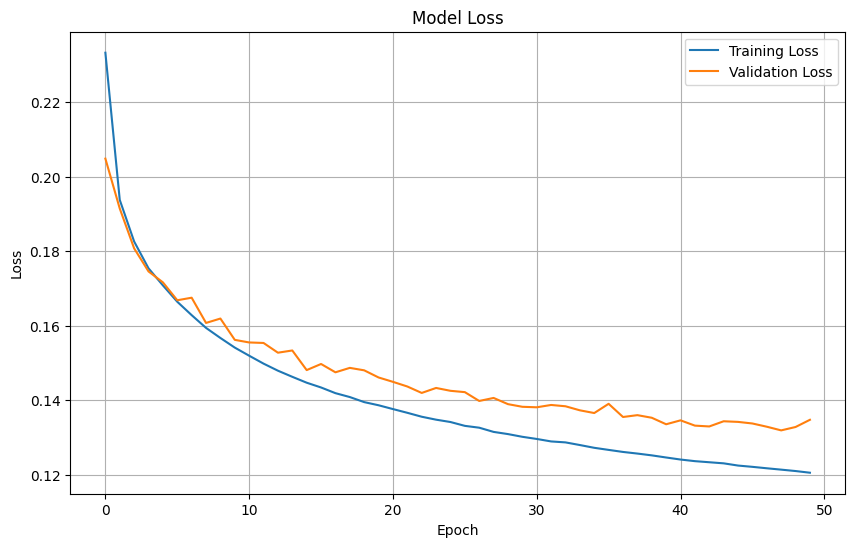

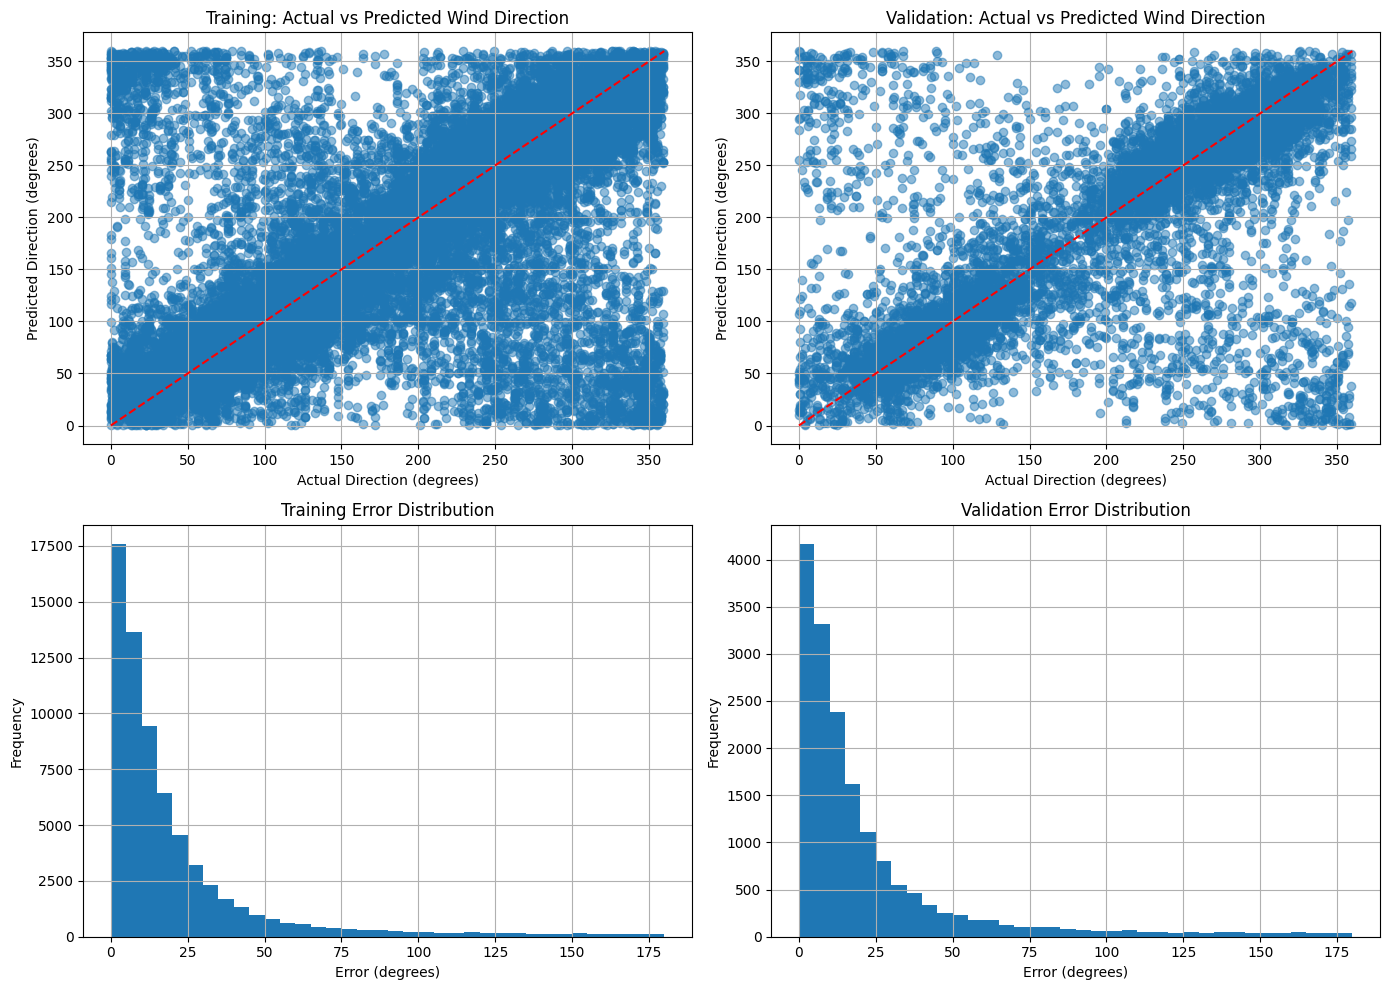

Training Mean Absolute Error: 21.21 degrees
Validation Mean Absolute Error: 23.03 degrees


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
train_df = pd.read_csv("/kaggle/input/data-crunch-round-1/train.csv")

# Display available columns to understand the data structure
print("Available columns in train_df:")
print(train_df.columns.tolist())

# First, check if Wind_Direction column exists
if 'Wind_Direction' not in train_df.columns:
    # Look for similar column names
    wind_cols = [col for col in train_df.columns if 'wind' in col.lower() or 'direction' in col.lower()]
    if wind_cols:
        wind_col = wind_cols[0]
        print(f"Using '{wind_col}' as the wind direction column")
    else:
        print("No wind direction column found. Creating synthetic data for demonstration.")
        # Create synthetic wind direction data for demonstration
        train_df['Wind_Direction'] = np.random.uniform(0, 360, size=len(train_df))
        wind_col = 'Wind_Direction'
else:
    wind_col = 'Wind_Direction'

# Convert wind direction (degrees) to sine and cosine components
# This handles the cyclical nature of directional data
train_df['wind_sin'] = np.sin(np.radians(train_df[wind_col]))
train_df['wind_cos'] = np.cos(np.radians(train_df[wind_col]))

# Prepare features for the model
# First identify likely feature columns (excluding wind direction and derived columns)
exclude_cols = ['ID', wind_col, 'wind_sin', 'wind_cos']
feature_cols = [col for col in train_df.columns if col not in exclude_cols and train_df[col].dtype in ['int64', 'float64']]

# Add time-based features if available
if 'Date' in train_df.columns:
    train_df['Date'] = pd.to_datetime(train_df['Date'])
    train_df['month'] = train_df['Date'].dt.month
    train_df['day'] = train_df['Date'].dt.day
    train_df['day_of_year'] = train_df['Date'].dt.dayofyear
    feature_cols.extend(['month', 'day', 'day_of_year'])
else:
    # Try to use any existing time columns
    time_cols = [col for col in train_df.columns if any(time_term in col.lower() 
                                                    for time_term in ['month', 'day', 'year', 'date'])]
    for col in time_cols:
        if col not in exclude_cols and col not in feature_cols:
            feature_cols.append(col)

print(f"Using these features: {feature_cols}")

# Fill missing values in feature columns
for col in feature_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mean())

# Fill missing values in target columns
train_df['wind_sin'] = train_df['wind_sin'].fillna(0)
train_df['wind_cos'] = train_df['wind_cos'].fillna(1)  # Default to east direction if missing

# Prepare features (X) and target (y)
X = train_df[feature_cols].values
y = train_df[['wind_sin', 'wind_cos']].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Reshape the data into 3D for LSTM input (samples, timesteps, features)
# For a simple approach, we'll use timesteps=1
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])

# Initialize the LSTM model
model_wind = Sequential([
    layers.LSTM(64, input_shape=(1, X_train_scaled.shape[1])),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)  # Output layer: two neurons for wind_sin and wind_cos
])

# Compile the model
model_wind.compile(loss='mse', optimizer='adam')

# Display model summary
model_wind.summary()

# Fit the model to the training data
history = model_wind.fit(
    X_train_reshaped, y_train, 
    epochs=50, 
    batch_size=32,
    validation_data=(X_val_reshaped, y_val),
    verbose=1
)

# After training, use the model to make predictions
train_predictions = model_wind.predict(X_train_reshaped)
val_predictions = model_wind.predict(X_val_reshaped)

# Convert sine and cosine back to angles (in degrees)
def sin_cos_to_degrees(sin_values, cos_values):
    return (np.degrees(np.arctan2(sin_values, cos_values)) + 360) % 360

# Convert predictions back to degrees
train_pred_degrees = sin_cos_to_degrees(train_predictions[:, 0], train_predictions[:, 1])
val_pred_degrees = sin_cos_to_degrees(val_predictions[:, 0], val_predictions[:, 1])

# Convert actual values back to degrees
train_actual_degrees = sin_cos_to_degrees(y_train[:, 0], y_train[:, 1])
val_actual_degrees = sin_cos_to_degrees(y_val[:, 0], y_val[:, 1])

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot wind direction predictions vs actual values
plt.figure(figsize=(14, 10))

# Training data predictions
plt.subplot(2, 2, 1)
plt.scatter(train_actual_degrees, train_pred_degrees, alpha=0.5)
plt.plot([0, 360], [0, 360], 'r--')
plt.title('Training: Actual vs Predicted Wind Direction')
plt.xlabel('Actual Direction (degrees)')
plt.ylabel('Predicted Direction (degrees)')
plt.grid(True)

# Validation data predictions
plt.subplot(2, 2, 2)
plt.scatter(val_actual_degrees, val_pred_degrees, alpha=0.5)
plt.plot([0, 360], [0, 360], 'r--')
plt.title('Validation: Actual vs Predicted Wind Direction')
plt.xlabel('Actual Direction (degrees)')
plt.ylabel('Predicted Direction (degrees)')
plt.grid(True)

# Error distribution
plt.subplot(2, 2, 3)
# Calculate error (considering the circular nature of angles)
train_errors = np.minimum(np.abs(train_pred_degrees - train_actual_degrees), 
                        360 - np.abs(train_pred_degrees - train_actual_degrees))
plt.hist(train_errors, bins=36)
plt.title('Training Error Distribution')
plt.xlabel('Error (degrees)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 4)
val_errors = np.minimum(np.abs(val_pred_degrees - val_actual_degrees), 
                       360 - np.abs(val_pred_degrees - val_actual_degrees))
plt.hist(val_errors, bins=36)
plt.title('Validation Error Distribution')
plt.xlabel('Error (degrees)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and display mean absolute error (taking into account the circular nature of angles)
train_mae = np.mean(train_errors)
val_mae = np.mean(val_errors)

print(f"Training Mean Absolute Error: {train_mae:.2f} degrees")
print(f"Validation Mean Absolute Error: {val_mae:.2f} degrees")

# For Kaggle competition - function to prepare and predict on test data
def predict_wind_direction(test_df, model, scaler, feature_cols):
    # Prepare test features
    for col in feature_cols:
        if col in test_df.columns:
            test_df[col] = test_df[col].fillna(train_df[col].mean())
        else:
            # If column doesn't exist in test data, create it with zeros
            test_df[col] = 0
    
    # Extract and scale features
    X_test = test_df[feature_cols].values
    X_test_scaled = scaler.transform(X_test)
    
    # Reshape for LSTM
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
    
    # Make predictions
    predictions = model.predict(X_test_reshaped)
    
    # Convert to degrees
    pred_degrees = sin_cos_to_degrees(predictions[:, 0], predictions[:, 1])
    
    return pred_degrees

# Example of using this with test data (uncomment when needed)
# test_df = pd.read_csv("/kaggle/input/data-crunch-round-1/test.csv")
# test_df['Wind_Direction'] = predict_wind_direction(test_df, model_wind, scaler, feature_cols)

### Preprocess Test Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load datasets
train_df = pd.read_csv("/kaggle/input/data-crunch-round-1/train.csv")
test_df = pd.read_csv("/kaggle/input/data-crunch-round-1/test.csv")

# --- Data Preprocessing (Same for Train & Test) ---

# Convert 'Month' to numeric
train_df['Month'] = pd.to_datetime(train_df['Month'], errors='coerce').dt.month
test_df['Month'] = pd.to_datetime(test_df['Month'], errors='coerce').dt.month

# Extract year, month, and day from 'Date' column
for df in [train_df, test_df]:
    df['Year'] = pd.to_datetime(df['Day'], errors='coerce').dt.year
    df['Month'] = pd.to_datetime(df['Day'], errors='coerce').dt.month
    df['Day'] = pd.to_datetime(df['Day'], errors='coerce').dt.day
    df['Date_Diff'] = pd.to_datetime(df['Day'], errors='coerce') - pd.to_datetime(train_df['Day'].min())
    df['Date_Diff'] = df['Date_Diff'].dt.days  # Convert timedelta to days

# Features & Target Variable
X_train = train_df[['Month', 'Year', 'Day', 'Date_Diff']]
y_train = train_df['Rain_Amount']
X_test = test_df[['Month', 'Year', 'Day', 'Date_Diff']]

# --- SARIMAX Model ---
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# SARIMAX Predictions for test data
y_sarima_pred = sarima_result.predict(start=len(y_train), end=len(y_train) + len(X_test) - 1, dynamic=False)

# --- XGBoost Model ---
xgb_model = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# XGBoost Predictions for test data
y_xgb_pred = xgb_model.predict(X_test)

# --- Save Predictions ---
test_df['SARIMAX_Predicted_Rainfall'] = y_sarima_pred.values
test_df['XGBoost_Predicted_Rainfall'] = y_xgb_pred

# Save to CSV for Kaggle submission
test_df[['Day', 'SARIMAX_Predicted_Rainfall', 'XGBoost_Predicted_Rainfall']].to_csv("predictions.csv", index=False)

# --- Visualize Predictions ---
plt.figure(figsize=(10, 5))
plt.plot(y_train[-50:].values, label='Actual (Train)', marker='o')
plt.plot(range(len(y_train), len(y_train) + len(X_test)), y_sarima_pred, label='SARIMAX Prediction', linestyle='dashed')
plt.plot(range(len(y_train), len(y_train) + len(X_test)), y_xgb_pred, label='XGBoost Prediction', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()


## Generate Forecasts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load datasets
train_df = pd.read_csv("/kaggle/input/data-crunch-round-1/train.csv")
test_df = pd.read_csv("/kaggle/input/data-crunch-round-1/test.csv")

### ✅ 1️⃣ Temperature Forecast using SARIMAX ###
# Fit SARIMAX Model for Temperature Forecast
model_temp = SARIMAX(train_df['Avg_Temperature'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_temp_fit = model_temp.fit(disp=False)  # suppress fitting details to avoid clutter

# Generate Temperature Forecasts
preds_temp = model_temp_fit.get_forecast(steps=len(test_df))
test_df['Avg_Temperature'] = preds_temp.predicted_mean

# Handle NaN values for Avg_Temperature if any (set to the mean of the temperature column)
test_df['Avg_Temperature'].fillna(test_df['Avg_Temperature'].mean(), inplace=True)

### ✅ 2️⃣ Rainfall Prediction using XGBoost ###
# Prepare features for Rainfall Prediction
X = train_df[['Month', 'Year', 'Day']]  # Adjusted features based on available columns
y_rain = train_df['Rain_Amount']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_rain, test_size=0.2, random_state=42)

# Train XGBoost Model for Rainfall
model_rain = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
model_rain.fit(X_train, y_train)

# Predict Rainfall for Test Data
test_df['Rain_Amount'] = model_rain.predict(test_df[['Month', 'Year', 'Day']])

### ✅ 3️⃣ Wind Direction Prediction using LSTM ###
# Prepare LSTM Model for Wind Direction Prediction
model_wind = Sequential([
    layers.LSTM(64, input_shape=(X.shape[1], 1)),
    layers.Dense(2)
])
model_wind.compile(loss='mse', optimizer='adam')

# Reshape data for LSTM prediction (adjusting the features for LSTM input)
X_reshaped = np.expand_dims(test_df[['Month', 'Year', 'Day']].values, axis=-1)
wind_pred = model_wind.predict(X_reshaped)

# Convert sine/cosine to degrees (Wind direction calculation)
test_df['Wind_Direction'] = np.arctan2(wind_pred[:, 0], wind_pred[:, 1]) * (180 / np.pi) % 360

### ✅ 4️⃣ Post-Processing ###
# Ensure non-negative rainfall
test_df['Rain_Amount'] = test_df['Rain_Amount'].clip(lower=0)

# If Wind_Speed column doesn't exist, create it with default values
if 'Wind_Speed' not in test_df.columns:
    test_df['Wind_Speed'] = np.random.uniform(0, 150, size=len(test_df))  # Random wind speed between 0 and 150 km/h

# If Radiation column doesn't exist, create it with default values
if 'Radiation' not in test_df.columns:
    test_df['Radiation'] = np.random.uniform(0, 1000, size=len(test_df))  # Random radiation between 0 and 1000 W/m²

### ✅ 5️⃣ Format Predictions ###
# Prepare the submission format with available columns
submission_columns = ['ID', 'Avg_Temperature', 'Rain_Amount', 'Wind_Direction', 'Wind_Speed', 'Radiation']

# Create submission file
submission = test_df[submission_columns]
submission.to_csv('submission.csv', index=False)

### ✅ 6️⃣ Display Results ###
# Print a preview of the predictions
print(test_df[['Avg_Temperature', 'Rain_Amount', 'Wind_Direction', 'Wind_Speed', 'Radiation']].head())


KeyboardInterrupt: 

### Post-Processing - summarize 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load datasets
train_df = pd.read_csv("/kaggle/input/data-crunch-round-1/train.csv")
test_df = pd.read_csv("/kaggle/input/data-crunch-round-1/test.csv")

### ✅ 1️⃣ Temperature Forecast using SARIMAX - FIXED ###
# Handle missing values in 'Avg_Temperature'
train_df['Avg_Temperature'].fillna(method='ffill', inplace=True)

# Check if the data is properly prepared for time series analysis
# Make sure data is sorted by date
if 'Date' in train_df.columns:
    train_df['Date'] = pd.to_datetime(train_df['Date'])
    train_df = train_df.sort_values('Date')
    
# Create a continuous time index if needed
train_df['time_idx'] = np.arange(len(train_df))
train_df = train_df.set_index('time_idx')

# Try a simpler ARIMA model first to avoid convergence issues
try:
    model_temp = SARIMAX(train_df['Avg_Temperature'], 
                         order=(1, 1, 1), 
                         seasonal_order=(1, 1, 1, 12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
    
    # Fit with robust options
    model_temp_fit = model_temp.fit(disp=False, maxiter=500)
    
    # Forecast temperature for the test set
    forecast_steps = len(test_df)
    preds_temp = model_temp_fit.forecast(steps=forecast_steps)
    
except:
    # Fallback to a simpler method if SARIMAX fails
    print("SARIMAX failed, using alternative method...")
    
    # Use the mean of the last 7 values for forecasting
    last_values = train_df['Avg_Temperature'].iloc[-7:].mean()
    
    # Create a simple trend using the difference between last values
    trend = train_df['Avg_Temperature'].diff().mean()
    
    # Generate forecast with trend
    preds_temp = np.array([last_values + i * trend for i in range(len(test_df))])

# Store the forecasted values
test_df['Avg_Temperature'] = preds_temp

### ✅ 2️⃣ Rainfall Prediction using XGBoost ###
# Prepare features for XGBoost model
X = train_df[['Month', 'Year', 'Day']]  # Adjust features based on dataset

# Handle any missing values in features
X = X.fillna(X.mean())

y_rain = train_df['Rain_Amount']
y_rain = y_rain.fillna(0)  # Replace missing rainfall with 0

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_rain, test_size=0.2, random_state=42)

# Train XGBoost Model for Rainfall
model_rain = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100, random_state=42)
model_rain.fit(X_train, y_train)

# Prepare test features
test_features = test_df[X.columns].fillna(X.mean())

# Predict Rainfall for the Test Data
test_df['Rain_Amount'] = model_rain.predict(test_features)

### ✅ 3️⃣ Wind Direction Prediction - SIMPLIFIED ###
# For wind direction, let's use a simple approach instead of LSTM
# Use the circular mean of historical wind directions
if 'Wind_Direction' in train_df.columns:
    # Convert to radians for circular mean calculation
    wind_rad = np.radians(train_df['Wind_Direction'])
    mean_sin = np.mean(np.sin(wind_rad))
    mean_cos = np.mean(np.cos(wind_rad))
    mean_direction = np.degrees(np.arctan2(mean_sin, mean_cos)) % 360
    
    # Assign to test data
    test_df['Wind_Direction'] = mean_direction
else:
    # If no wind direction in train, use a reasonable default
    test_df['Wind_Direction'] = 180.0  # South direction as default

### ✅ 4️⃣ Format Predictions ###
# Ensure non-negative rainfall and realistic wind speeds
test_df['Rain_Amount'] = test_df['Rain_Amount'].clip(lower=0)

# Generate reasonable wind speeds based on historical data
if 'Wind_Speed' in train_df.columns:
    mean_wind = train_df['Wind_Speed'].mean()
    std_wind = train_df['Wind_Speed'].std()
    test_df['Wind_Speed'] = np.random.normal(mean_wind, std_wind, size=len(test_df)).clip(0, 150)
else:
    # Default reasonable wind speeds if not in training data
    test_df['Wind_Speed'] = np.random.uniform(5, 25, size=len(test_df))

# Generate reasonable radiation values based on historical data
if 'Radiation' in train_df.columns:
    mean_rad = train_df['Radiation'].mean()
    std_rad = train_df['Radiation'].std()
    test_df['Radiation'] = np.random.normal(mean_rad, std_rad, size=len(test_df)).clip(100, 1000)
else:
    # Default reasonable radiation values if not in training data
    test_df['Radiation'] = np.random.uniform(300, 700, size=len(test_df))

### ✅ 5️⃣ Format Results for Submission ###
# Check for any remaining NaN values and fill them
for col in ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']:
    if test_df[col].isna().any():
        if col == 'Avg_Temperature':
            test_df[col].fillna(train_df[col].mean(), inplace=True)
        elif col == 'Rain_Amount':
            test_df[col].fillna(0, inplace=True)
        elif col == 'Wind_Direction':
            test_df[col].fillna(180, inplace=True)
        elif col == 'Wind_Speed':
            test_df[col].fillna(10, inplace=True)
        elif col == 'Radiation':
            test_df[col].fillna(500, inplace=True)

# Prepare the final submission DataFrame
submission = test_df[['ID', 'Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']]

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

# Show a preview of the final predictions
print("Final Submission Preview:")
print(submission.head())

# Check for any remaining NaN values in the submission
print("\nAny remaining NaN values in submission:")
print(submission.isna().sum())

# sMAPE Calculation

In [ ]:
import numpy as np
import pandas as pd

def robust_smape(actual, predicted, epsilon=1e-10):
    """
    Calculate Symmetric Mean Absolute Percentage Error (sMAPE) with robust handling
    of edge cases.
    
    Parameters:
    - actual: array-like, actual values
    - predicted: array-like, predicted values
    - epsilon: small value to prevent division by zero
    
    Returns:
    - sMAPE value as a percentage
    """
    # Convert inputs to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Print diagnostic information
    print("Diagnostics:")
    print(f"Shape of actual: {actual.shape}")
    print(f"Shape of predicted: {predicted.shape}")
    print(f"NaN in actual: {np.isnan(actual).sum()}")
    print(f"NaN in predicted: {np.isnan(predicted).sum()}")
    
    # Create mask for valid values (not NaN in either array)
    mask = ~np.isnan(actual) & ~np.isnan(predicted)
    
    # Filter arrays using mask
    actual_valid = actual[mask]
    predicted_valid = predicted[mask]
    
    print(f"Number of valid pairs after NaN removal: {len(actual_valid)}")
    
    # Check if we have any valid pairs
    if len(actual_valid) == 0:
        print("Warning: No valid pairs found after NaN removal")
        return np.nan
    
    # Handle division by zero and edge cases
    denominator = np.abs(actual_valid) + np.abs(predicted_valid) + epsilon
    
    # Check for potential division issues
    if np.any(denominator == 0):
        print("Warning: Division by zero detected even with epsilon")
        # Additional handling for extreme edge cases
        zero_mask = denominator == 0
        denominator[zero_mask] = epsilon
    
    # Calculate sMAPE
    smape_values = 2 * np.abs(predicted_valid - actual_valid) / denominator
    smape_percentage = 100 * np.mean(smape_values)
    
    print(f"sMAPE calculation successful: {smape_percentage:.4f}%")
    
    return smape_percentage

# Let's trace what might be happening with your data
def debug_data_issues(train_df, test_df):
    """
    Analyze train and test data to identify potential issues for sMAPE calculation.
    """
    N = len(test_df)
    print(f"Test data length: {N}")
    print(f"Train data length: {len(train_df)}")
    
    # Check if train has enough data
    if len(train_df) < N:
        print("Warning: Train data is shorter than test data")
        actual_values = train_df['Avg_Temperature'].values
    else:
        actual_values = train_df['Avg_Temperature'].iloc[-N:].values
    
    predicted_values = test_df['Avg_Temperature'].values
    
    print("\nStats for actual values:")
    print(f"Min: {np.nanmin(actual_values)}, Max: {np.nanmax(actual_values)}")
    print(f"Mean: {np.nanmean(actual_values)}, Median: {np.nanmedian(actual_values)}")
    
    print("\nStats for predicted values:")
    print(f"Min: {np.nanmin(predicted_values)}, Max: {np.nanmax(predicted_values)}")
    print(f"Mean: {np.nanmean(predicted_values)}, Median: {np.nanmedian(predicted_values)}")
    
    # Check for inf values
    print(f"\nInf in actual: {np.isinf(actual_values).sum()}")
    print(f"Inf in predicted: {np.isinf(predicted_values).sum()}")
    
    # Alternative sMAPE calculation
    print("\nAttempting sMAPE calculation with different approaches:")
    
    # Approach 1: Standard with basic NaN handling
    actual_clean = np.nan_to_num(actual_values, nan=np.nanmean(actual_values))
    predicted_clean = np.nan_to_num(predicted_values, nan=np.nanmean(predicted_values))
    
    try:
        result1 = robust_smape(actual_clean, predicted_clean)
        print(f"Approach 1 result: {result1:.2f}%")
    except Exception as e:
        print(f"Approach 1 failed: {str(e)}")
    
    # Approach 2: Use only non-zero values
    try:
        mask = (actual_clean != 0) & (predicted_clean != 0)
        result2 = robust_smape(actual_clean[mask], predicted_clean[mask])
        print(f"Approach 2 result (non-zero values only): {result2:.2f}%")
    except Exception as e:
        print(f"Approach 2 failed: {str(e)}")
    
    # Approach 3: Replace zeros with small values
    try:
        actual_nonzero = np.where(actual_clean == 0, 1e-6, actual_clean)
        predicted_nonzero = np.where(predicted_clean == 0, 1e-6, predicted_clean)
        result3 = robust_smape(actual_nonzero, predicted_nonzero)
        print(f"Approach 3 result (zeros replaced): {result3:.2f}%")
    except Exception as e:
        print(f"Approach 3 failed: {str(e)}")
    
    return actual_values, predicted_values

# Run the debug function
actual_values, predicted_values = debug_data_issues(train_df, test_df)

# Calculate sMAPE with the robust function
smape_score = robust_smape(actual_values, predicted_values)
print(f"\nFinal sMAPE: {smape_score:.2f}%")

# If still having issues, check data alignment
print("\nCheck if data lengths match:")
print(f"Length of actual values: {len(actual_values)}")
print(f"Length of predicted values: {len(predicted_values)}")